In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



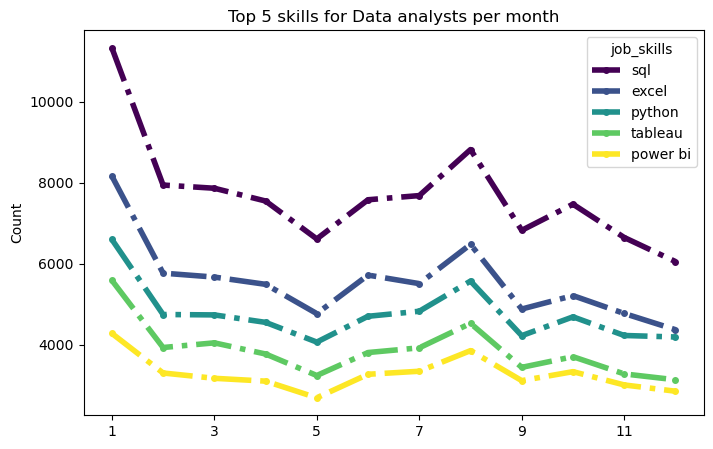

In [21]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()
df_DA['job_posted_month_no']= df_DA['job_posted_date'].dt.month
df_DA_exploded = df_DA.explode('job_skills')
df_pivot_DA = df_DA_exploded.pivot_table(index='job_posted_month_no', 
                                         columns='job_skills', 
                                         aggfunc='size', 
                                         fill_value=0)
df_pivot_DA.loc['Total'] = df_pivot_DA.sum() # Crea una nueva fila que muestra el total de cada columna

df_pivot_DA.loc['Total'].sort_values(ascending=False)   #Filtra por la fila Total creada
df_pivot_DA.loc['Total'].sort_values(ascending=False).index  # Se toman los index solamente
df_pivot_DA[df_pivot_DA.loc['Total'].sort_values(ascending=False).index] # Se filtra en el propio DF

df_pivot_DA = df_pivot_DA[df_pivot_DA.loc['Total'].sort_values(ascending=False).index]
df_pivot_DA = df_pivot_DA.drop('Total') #Eliminamos la fila Total creada para el filtro

df_pivot_DA.iloc[:, :5].plot(kind='line',
                             linewidth=4,          #espesor de la linea 
                             linestyle='-.',       #estilo de la linea (-- , -. , : , -)
                             colormap='viridis',   #Diferentes arreglos de colores (usa cheatsheets)
                             marker='o',           # options: o x + * , . 1 y mas
                             markersize=4,         # Tamano del marcador
                             figsize = (8,5))    # Tamano de la grafica
plt.title('Top 5 skills for Data analysts per month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

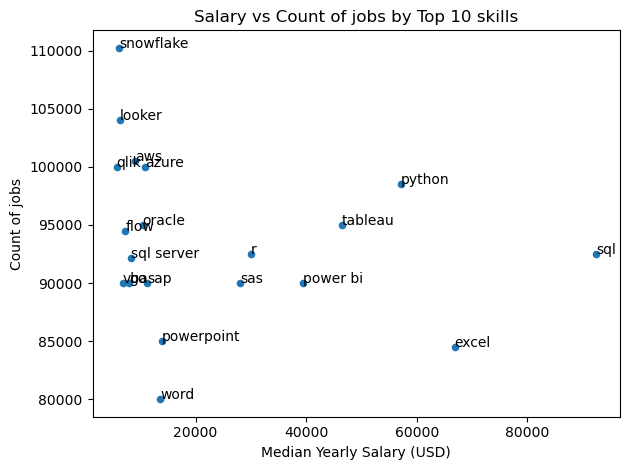

In [ ]:
df_DA =df[df['job_title_short']=='Data Analyst'].copy()
df_DA_explode = df_DA.explode('job_skills')
skill_stats = df_DA_explode.groupby('job_skills').agg(
                                                      skill_count = ('job_skills', 'count'),
                                                      median_salary = ('salary_year_avg', 'median')
                                                     )
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.ylabel('Count of jobs')
plt.xlabel('Median Yearly Salary (USD)')
plt.title('Salary vs Count of jobs by Top 10 skills')
plt.tight_layout()
plt.show()


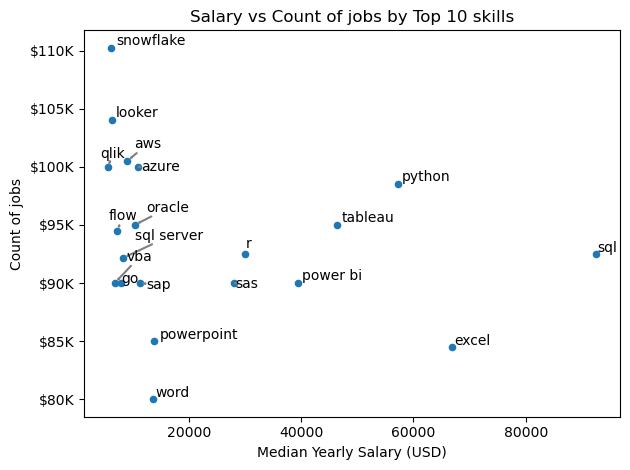

In [ ]:
from adjustText import adjust_text   # Libreria se debe instalar con pip install adjustText
                                     # para evitar sobreposicion de las etiquetas

# fig, ax = plt.subplots() ... Esto se usa para tener acceso a los ejes y poder modificarlos


skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = [] # Se llena con el append dentro del for, que es la expresion que se usa para las etiquetas
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

#Toda la expresion a continuacion es para modificar los ejes
ax =plt.gca()  
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) # De 110000 a $110K

# Otras basicas customizations
plt.ylabel('Count of jobs')
plt.xlabel('Median Yearly Salary (USD)')
plt.title('Salary vs Count of jobs by Top 10 skills')
plt.tight_layout()
plt.show()

Ejercicios

In [39]:
# Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

# Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
# Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
# Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

In [70]:
df_ce = df[df['job_title_short']=='Cloud Engineer'].copy()
df_ce['month'] = df_ce['job_posted_date'].dt.to_period('M')

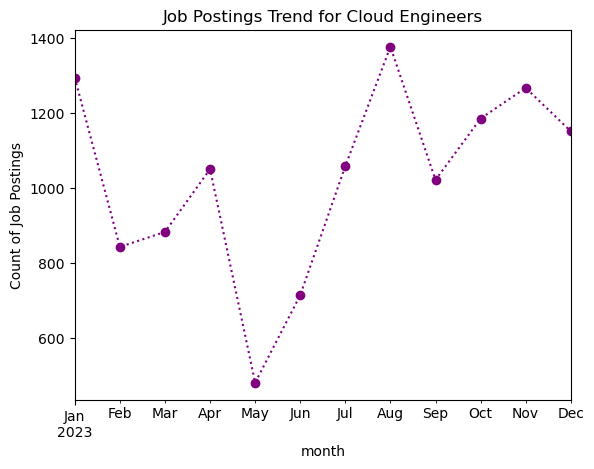

In [72]:
df_ce_plot = df_ce.groupby('month').size()
df_ce_plot.plot(kind='line', x='month', y='count', linestyle=':', marker='o', color='Purple')
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.show()



In [ ]:
# Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

#Create a DataFrame called SDA_df. 
#Customize the plot by setting the bar colors to 5 different colors with the variable colors.
#Add a grid to the y-axis only and making it dashes.
#Rotate the x-axis labels by 45 degrees.
#Label the y-axis as 'Number of Job Postings' and set the title to
# 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

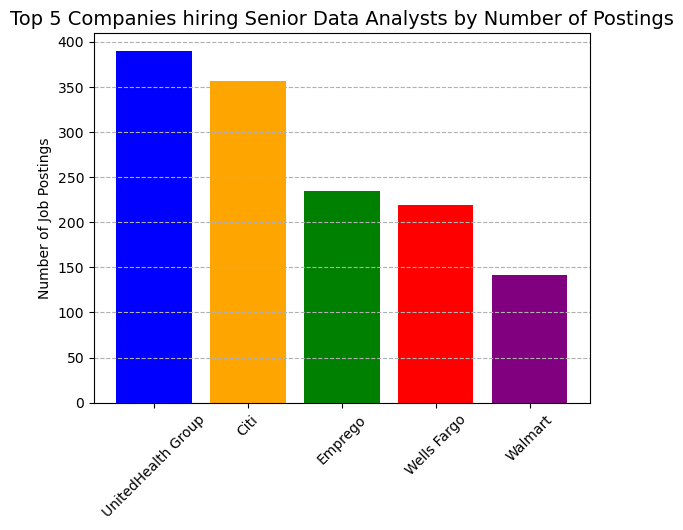

In [106]:
SDA_df = df[df['job_title_short']=='Senior Data Analyst'].copy()
SDA_df_top5 = SDA_df.groupby('company_name').size()
SDA_df_top5 = SDA_df_top5.sort_values(ascending=False).head(5)

plt.bar(SDA_df_top5.index, SDA_df_top5.values, color = ['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--')

